# Machine Learning in Python

## Linear Regression

In [1]:
import pandas as pd

import quandl
# We are going to use the Alphabet Google stock data for our analysis.
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [2]:
# We are going to use the adjusted variables in our analysis as they make more sense.
# Adjusted columns are adjusted for stock splits over time, which makes them more reliable for doing analysis.
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

# Data transformation 
# We are creating new variable that represents the volatility in share prices each day.
df["HCT_pct"] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Low']

#We are creating new variable that represents the volatility based on closing prices each day.
df["pct_change"] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open']

In [3]:
# Now we will define a new dataframe that we are interested.
df = df[['HCT_pct', 'pct_change', 'Adj. Volume', 'Adj. Close']]

In [4]:
df.head()

,HCT_pct,pct_change,Adj. Volume,Adj. Close
Date,,,,
2004-08-19,0.084410,0.003250,44659000.0,50.322842
2004-08-20,0.085373,0.072270,22834300.0,54.322689
2004-08-23,0.040624,-0.012279,18256100.0,54.869377
2004-08-24,0.077532,-0.057264,15247300.0,52.597363
2004-08-25,0.039661,0.011837,9188600.0,53.164113


In [5]:
'''Now we wants to predict the Adj.Close variable but the problem is while forecasting we are not going to have 
current values for the feature that we are using. So we wants to predict the Adj. Close based on the values of features
in the past.'''

import math
forecast_var = 'Adj. Close'
forecast_out = int(math.ceil(0.01*len(df)))

# Now we will fill all the missing values with -99999, as the algorithm do not identify NA as missing values.
df.fillna(value = -99999, inplace = True)

In [6]:
#Now as we want to predict in future we will shift our Adj.close(label) to a future value.
df["label"] = df[forecast_var].shift(-forecast_out)
df.head()

,HCT_pct,pct_change,Adj. Volume,Adj. Close,label
Date,,,,,
2004-08-19,0.084410,0.003250,44659000.0,50.322842,69.078238
2004-08-20,0.085373,0.072270,22834300.0,54.322689,67.839414
2004-08-23,0.040624,-0.012279,18256100.0,54.869377,68.912727
2004-08-24,0.077532,-0.057264,15247300.0,52.597363,70.668146
2004-08-25,0.039661,0.011837,9188600.0,53.164113,71.219849


In [7]:
df.dropna(inplace = True)
df.tail()

,HCT_pct,pct_change,Adj. Volume,Adj. Close,label
Date,,,,,
2018-01-30,0.011426,-0.000297,1792602.0,1177.37,1094.00
2018-01-31,0.012132,-0.001343,1643877.0,1182.22,1053.15
2018-02-01,0.015470,0.004762,2774967.0,1181.59,1026.55
2018-02-02,0.018116,-0.007291,5798880.0,1119.20,1054.09
2018-02-05,0.055122,-0.028938,3742469.0,1068.76,1006.94


In [8]:
# Now we will define set of features and labels as X and y.
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

X = np.array(df.drop(['label'],1))
y = np.array(df['label'])

# Scale the variables before running the algorithm.
X = preprocessing.scale(X)

# Divide the data into train and test dataset
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

#linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

#scoring the algo on test data and checking accuracy.
accuracy = lm.score(X_test, y_test)
print(accuracy)

0.978611132572556


/Users/atyagi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# Forecasting and prediction
# Now while forecasting we have a problem that the data that we have used for training is scaled data.
# We need to scale the input values for forecasting as well. But we need to do that with the whole data.
# We need to define our df dataset again as we have deleted out forecast input values.
import pandas as pd
import math
import quandl
import numpy as np
import datetime
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

# Data transformation 
df["HCT_pct"] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Low']
df["pct_change"] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open']

df = df[['HCT_pct', 'pct_change', 'Adj. Volume', 'Adj. Close']]

forecast_var = 'Adj. Close'
forecast_out = int(math.ceil(0.01*len(df)))
df.fillna(value = -99999, inplace = True)

df["label"] = df[forecast_var].shift(-forecast_out)

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)

X_lately = X[-forecast_out:] # Forecast input data
X = X[:-forecast_out]

df.dropna(inplace = True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

lm = LinearRegression()
lm.fit(X_train, y_train)
accuracy = lm.score(X_test, y_test)
print(accuracy)

0.9773187094209871


In [15]:
forecast_set = lm.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1102.05982947 1073.44561524 1019.35820539 1059.51144058 1074.37832591
 1075.13837255 1093.03831727 1111.58824325 1116.54100007 1124.18621778
 1133.95815233 1130.68396604 1149.60236336 1165.8848485  1137.04300911
 1123.62549594 1088.20404996 1103.57256405 1115.22403859 1122.71960848
 1136.10735369 1151.46704183 1182.18752909 1187.49038742 1158.14143839
 1170.48405067 1171.46704685 1154.27793143 1118.94322953 1115.83783547
 1114.55379959 1070.67494792 1043.37542097 1070.96189488 1019.82024358] 0.9773187094209871 35


In [16]:
# Now let's plot the forecast.
df['forecast'] = np.nan

In [17]:
last_time = df.iloc[-1].name
last_unix = last_time.timestamp()
one_day = 86400
next_day = last_unix + one_day

In [18]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_day)
    next_day += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

In [19]:
df.tail()

,HCT_pct,pct_change,Adj. Volume,Adj. Close,label,forecast
Date,,,,,,
2018-03-08 05:30:00,NaN,NaN,NaN,NaN,NaN,1114.553800
2018-03-09 05:30:00,NaN,NaN,NaN,NaN,NaN,1070.674948
2018-03-10 05:30:00,NaN,NaN,NaN,NaN,NaN,1043.375421
2018-03-11 05:30:00,NaN,NaN,NaN,NaN,NaN,1070.961895
2018-03-12 05:30:00,NaN,NaN,NaN,NaN,NaN,1019.820244


<function matplotlib.pyplot.show(*args, **kw)>

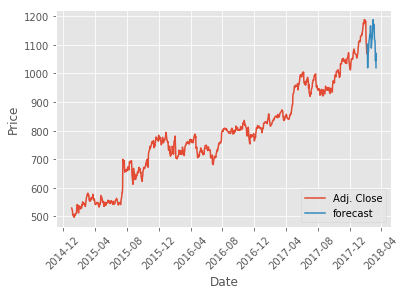

In [21]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
plt.plot(df.loc[df.index > '2015-01-01']["Adj. Close"]) # We are only plotting data from 2015 onwards
plt.plot(df.loc[df.index > '2015-01-01']["forecast"])
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylabel("Price")
plt.legend(loc = 4)
plt.show

In [23]:
# We can also save our classifier as well. This is important when our classifier takes a lot of time to train.
import pickle

with open("LinearRegression.pickle", "wb") as f:
    pickle.dump(lm, f)

In [24]:
# Now to load out classifier
pickle_in = open("LinearRegression.pickle","rb")
lm = pickle.load(pickle_in)